<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Installations" data-toc-modified-id="Installations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Installations</a></span></li><li><span><a href="#Google-Search-Engine" data-toc-modified-id="Google-Search-Engine-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Google Search Engine</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Mapping-Cleveland,-OH" data-toc-modified-id="Mapping-Cleveland,-OH-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Mapping Cleveland, OH</a></span><ul class="toc-item"><li><span><a href="#Image-properties" data-toc-modified-id="Image-properties-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Image properties</a></span></li></ul></li><li><span><a href="#Supervised-Classification" data-toc-modified-id="Supervised-Classification-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Supervised Classification</a></span><ul class="toc-item"><li><span><a href="#Train-dataset" data-toc-modified-id="Train-dataset-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Train dataset</a></span></li></ul></li><li><span><a href="#Train-classifier" data-toc-modified-id="Train-classifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Train classifier</a></span></li><li><span><a href="#Classify-Image" data-toc-modified-id="Classify-Image-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Classify Image</a></span></li><li><span><a href="#Change-colors-for-map" data-toc-modified-id="Change-colors-for-map-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Change colors for map</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Export" data-toc-modified-id="Export-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Export</a></span></li></ul></li></ul></div>

# Installations

In [1]:
!pip install earthengine-api

In [2]:
!pip install earthengine-api --upgrade

In [3]:
!pip install geemap

# Google Search Engine 

Continuing the study to look at 2020-2021 data, my main goals for this project are:

1. Find more **Google Street View (GSV)** data for tree cover and green space, as they have been shown to have stronger relationships with health outcomes than Geographic Information System (GIS) methods. My previous data used remote sensing images (i.e., land cover and vegetation indices). From an article by [Helbich et al.](https://www.sciencedirect.com/science/article/pii/S016041201832539X) it was mentioned that overhead-view measures may fail to capture how people perceive the environment on the site.

2. Find more **NDVI (Normalized Difference Vegetation Index)** data for tree cover, percent canopy, and green space.  Here are some basic info on this metric:
- A vegetation index is an indicator that describes the greenness — the relative density and health of vegetation — for each picture element, or pixel, in a satellite image. 
- Although there are several vegetation indices, one of the most widely used is the Normalized Difference Vegetation Index (NDVI). 
- NDVI quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs). 
- NDVI values range from +1.0 to -1.0. Areas of barren rock, sand, or snow usually show very low NDVI values (for example, 0.1 or less). Sparse vegetation such as shrubs and grasslands or senescing crops may result in moderate NDVI values (approximately 0.2 to 0.5). High NDVI values (approximately 0.6 to 0.9) correspond to dense vegetation such as that found in temperate and tropical forests or crops at their peak growth stage ([USGS](https://www.usgs.gov/special-topics/remote-sensing-phenology/science/ndvi-foundation-remote-sensing-phenology#:~:text=NDVI%20values%20range%20from%20%2B1.0,(approximately%200.2%20to%200.5).)).
- Formula for calculation: **NDVI = (NIR-Red)/(NIR+Red)**

In [4]:
import ee
import geemap

In [5]:
ee.Authenticate()

Enter verification code: 4/1AX4XfWiAau_FQMYqoUHsQ4M9ps9ue-D5jXHGvqBbXpK9pTvSL6qqo6DCek0

Successfully saved authorization token.


In [6]:
ee.Initialize()

# EDA

In [7]:
geemap.ee_search()

We'll first use MOD13A1.006 Terra Vegetation Indices 16-Day Global 500m, which provides VI value at a per pixel basis. First layer is NDVI, which is also referred to as the continuity index to the existing National Oceanic Atmospheric Administration-Advanced Very High Resolution Radiometer (NOAA-AVHRR) derived NDVI. The second layer is EVI, which minimizes canopy background variations and maintains sensitivity over dense vegetation conditions. The EVI also uses the blue band to remove residual atmosphere contamination caused by smoke and sub-pixel thin cloud clouds. The MODIS NDVI and EVI products are computed from atmospherically corrected bi-directional surface reflectances that have been masked for water, clouds, heavy aerosols, and cloud shadows.

In [8]:
import ee 
import geemap

# Create a map centered at (lat, lon). This will show the whole U.S.
Map = geemap.Map(center=[40, -100], zoom=4)

# Grab dataset using ImageCollection. This is the Terra Vegetation Indices 16-Day
# With NDVI and EVI.
dataset = ee.ImageCollection('MODIS/006/MOD13A1')
ndvi = dataset.select('NDVI')
ndviVis = {
  'min': 0.0,
  'max': 9000.0,
  'palette': [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ],
}
Map.addLayer(ndvi, ndviVis, 'NDVI')

# Display the map.
Map


Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

## Mapping Cleveland, OH

In [9]:
# Going to make a variable called worldMap, an interactive map. This will be used to map Cleveland, OH
worldMap = geemap.Map()
worldMap

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [32]:
# Add data to map
# USGS Landsat 8 Tier 1 SR
point = ee.Geometry.Point([-81.71, 41.44])

L8 = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')

image = ee.ImageCollection(L8)\
    .filterBounds(point)\
    .filterDate('2018-01-01', '2022-12-31') \
    .sort("CLOUD_COVER") \
    .first() \
    .select('B[0-9]')

vis_params = {
    'min': 0,
    'max': 3000,
    'bands': ["B5", "B4", "B3"],
}

worldMap.centerObject(point, 12)
worldMap.addLayer(image, vis_params, "Landsat-8")

In [33]:
# Create another interactive map to map USGS Landsat Tier 1 RT OLI Raw Scenes
worldMap1 = geemap.Map()
worldMap1

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [34]:
point1 = ee.Geometry.Point([-81.71, 41.44])

L8_1 = ee.ImageCollection('LANDSAT/LO08/C01/T1_RT')

image1 = ee.ImageCollection(L8_1)\
    .filterBounds(point)\
    .filterDate('2019-07-01', '2022-10-31') \
    .sort("CLOUD_COVER") \
    .first() \
    .select('B[0-9]')

vis_params1 = {
    'min': 6000,
    'max': 9000,
    'bands': ["B4", "B3", "B2"],
}

worldMap1.centerObject(point1, 12)
worldMap1.addLayer(image1, vis_params1, "Landsat-8_1")

### Image properties

In [35]:
# For our first map
ee.Date(image.get('system:time_start')).format('YYYY-MM-dd').getInfo()

'2019-09-18'

In [36]:
image.get('CLOUD_COVER').getInfo()

0.01

In [37]:
# For our second map
ee.Date(image1.get('system:time_start')).format('YYYY-MM-dd').getInfo()

'2020-11-07'

In [38]:
image1.get('CLOUD_COVER').getInfo()

22.01

## Supervised Classification

### Train dataset

There are many ways to create a region for generating training dataset, however, our focus is on creating a **buffer zone** around a point, like a region = **ee.Geometry.Point([-81.62, 41.38]).buffer(10000)**

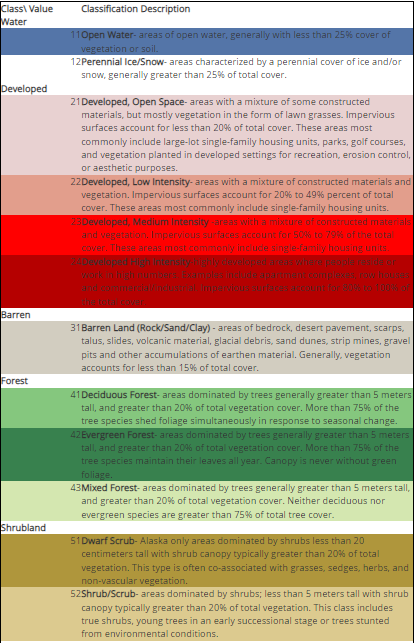

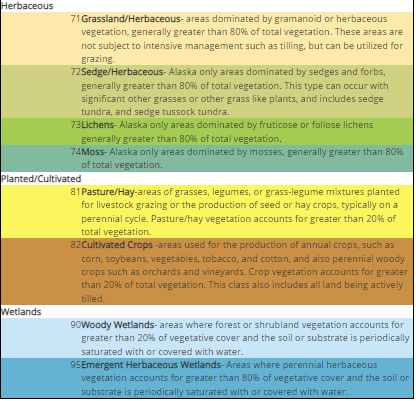

Above is the USGS National Land Cover Database (NLCD) Land Cover classification, with definitions included. 

In [39]:
nlcd = ee.Image('USGS/NLCD/NLCD2016').select('landcover').clip(image.geometry())
worldMap.addLayer(nlcd, {}, 'NLCD')
worldMap

Map(bottom=391735.0, center=[41.44, -81.71], controls=(WidgetControl(options=['position', 'transparent_bg'], w…

Here is where I started getting excited. I was able to add a layer of landcover classification to the map, and as we can see, we're able to distinguish city developed/city constructed areas from deciduous and areas of grass. Now let's get to creating a training dataset.

In [40]:
# Create training dataset
dots = nlcd.sample(**{
    'region': image.geometry(),
    'scale': 30,
    'numPixels': 9000,
    'seed': 0,
    'geometries': True
})

worldMap.addLayer(dots, {}, 'training', False)

In [41]:
# Find out how many points were generated total
print(dots.size().getInfo())

7538


In [42]:
# Find out where the first point is located
print(dots.first().getInfo())

{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-80.90576995629353, 42.04025896883239]}, 'id': '0', 'properties': {'landcover': 11}}


## Train classifier

In [43]:
# Using the EE Data Catalog, we'll pick out the bands we need to make predictions. These are our vectors.
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']

# Create a variable that stores land cover labels; creates classes
label = 'landcover'

# Layer on points on the imagery to obtain training
train = image.select(bands).sampleRegions(**{
    'collection': dots,
    'properties': [label],
    'scale': 30
})

# Train CART classifier
trained = ee.Classifier.smileCart().train(train, label, bands) # .smileCart = Classification and Regression Trees

In [44]:
# Looking at first training data
print(train.first().getInfo()) # the classification will be 'landcover'

{'type': 'Feature', 'geometry': None, 'id': '0_0', 'properties': {'B1': 331, 'B2': 330, 'B3': 289, 'B4': 145, 'B5': 79, 'B6': 47, 'B7': 32, 'landcover': 11}}


I'll try a couple more classifiers.

In [45]:
# Train Random Forest classifier
train_RF = ee.Classifier.smileRandomForest(10).train(train, label, bands) # .smileRandForest= empty RF classifier

## Classify Image

In [46]:
# Classify with same bands used for training
# Basically, we're assigning a random color to each class
res = image.select(bands).classify(trained)

# Show clusters with randomized colors
worldMap.addLayer(res.randomVisualizer(), {}, 'classified')
worldMap

Map(bottom=391735.0, center=[41.44, -81.71], controls=(WidgetControl(options=['position', 'transparent_bg'], w…

In [47]:
# For random forest
#res1 = image.select(bands).classify(train_RF)

# Show clusters with randomized colors
#worldMap.addLayer(res1.randomVisualizer(), {}, 'classified_RF')
#worldMap

These are not very useful colors, but have no fear, we can fix that!

## Change colors for map

Here we'll use two image properties: landcover_class_values and land_class_palette.

In [48]:
# Our goal is to use the official NLCD landcover classification colors
val_class = nlcd.get('landcover_class_values').getInfo()
val_class

[11,
 12,
 21,
 22,
 23,
 24,
 31,
 41,
 42,
 43,
 51,
 52,
 71,
 72,
 73,
 74,
 81,
 82,
 90,
 95]

In [49]:
# Find out the HTML colors and their corresponding val_class
val_pal = nlcd.get('landcover_class_palette').getInfo()
val_pal

['476ba1',
 'd1defa',
 'decaca',
 'd99482',
 'ee0000',
 'ab0000',
 'b3aea3',
 '68ab63',
 '1c6330',
 'b5ca8f',
 'a68c30',
 'ccba7d',
 'e3e3c2',
 'caca78',
 '99c247',
 '78ae94',
 'dcd93d',
 'ab7028',
 'bad9eb',
 '70a3ba']

In [50]:
# Use .set to render the colors
# This is for our first classifier
landcover = res.set('classification_class_values', val_class)
landcover = landcover.set('classification_class_palette', val_pal)

In [51]:
worldMap.addLayer(landcover, {}, 'Land cover')
worldMap

Map(bottom=391735.0, center=[41.44, -81.71], controls=(WidgetControl(options=['position', 'transparent_bg'], w…

In [ ]:
#

## Results

In [52]:
# Add legend
worldMap.add_legend(builtin_legend='NLCD')
worldMap

Map(bottom=391735.0, center=[41.44, -81.71], controls=(WidgetControl(options=['position', 'transparent_bg'], w…

## Export 

In [57]:
# To PC
import os
out_dir = os.path.join(os.path.expanduser('Downloads'))
out_file = os.path.join(out_dir, 'landcover.tif')

In [58]:
geemap.ee_export_image(landcover, filename=out_file, scale=900)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\yuvem\Downloads\landcover.tif


In [60]:
# To Google Drive
geemap.ee_export_image_to_drive(landcover, description='landcover_CLE', folder='export', scale=900)

Exporting landcover_CLE ...
